# **Chapter 2. [텍스트] 뉴스기사 3줄 요약하기**


---
### 📝 **학습 목차**
> 2-1. 프로젝트 개요 <br>
> 2-2. 바이너리 파일을 문자열로 변경 - base64 <br>
> 2-3. 문자열 다루기 - textwrap, re <br>
> 2-4. 단어 개수 구하기 - collections.Counter <br>
> 2-5. 문서 요약하기 - gensim <br>
> 2-6. 텍스트 파일 저장 - open, close <br>
> **2-7. 프로젝트 실습**

## 2-7. 프로젝트 실습 📰

> ### 진행 순서
>  1. 뉴스 기사 (base64 파일) 디코딩
>  2. 문서 요약 / 키워드 추출
>  3. 요약 리포트 작성
>  4. html 파일로 Export

### 2-7-1. 뉴스 기사 (base64 파일) 디코딩

[원본 기사](https://n.news.naver.com/mnews/article/018/0005303739?sid=105)

#### 바이너리 파일 읽기

In [1]:
# 기사 이미지
f = open("news/image", 'rb')
image = f.readlines()
f.close()

In [2]:
print(image)   # base64 인코딩 파일

[b'UklGRvh+AABXRUJQVlA4IOx+AADQBQKdASq8AuoBPm0wlUekIr+jpROL4/ANiU3RLKo1+cCEDryvIsJJ9hKZzAuNf6j9r/H39//Mzk33j+L/zv7Lf4b9k/or5L8OfZvh3+z/tx1gpsPbn4K/Of2//Lf+r+8f/////er/Z/8H/Ff5H49/1f/Yf+L/G/AN/VP7T/w/8D/kfi1/2/8z/OffD/gv+t+QHwI/jH9V/7P+F/4H//+WH/Yf9f/Gfvt8uP6R/ev+t/jf8r////r9gH9S/xv/n9pr/cf/L3a/7l/sP/37in8w/yP/3/eb33f3I+Fv+tf9P9yfgj/Zb/7ewB/+va+/gH/s6tfy//ef7D0t/P/6H/k+Hv5193/zPNszD9s2p34T5+v8/wh/bv7L0FMhe1nAR3MP53/u9JPtl7An66+nH/l8Yf8H/3/YE/pf+l/a33kv+by8ftnqL9LX95P//7vRrs58oOXyIsAeYrUpmT5vWfIiwB5itSmZPm9XR+8x4L/+078/1rTltLahep6N2ROMTPG9XXNEHbwb8+/s+j7xWpS/wK0rqTjLS7nL8liM+UnE3v9vNsQbF0xVh7ZNprqZxG21Xa/zTu+bKfkB1MwSH9DkQ/EGyBH+SPgAwUDpHy+8jvsYR5Doxm6MK7l8123G4BuLhrHyZv9UGfY6l1iESpk8dcsMPF+A0bp06mZPnLFgDzKQtBJ83rPkRYBy+3zJsZhvo1erPf0+6RTne/JiLO9nHDCc2e1MsT5vV/ZcxGOMGjI9oMivufPWdaGXXO8ZRzr+7xhHlmQ03eTTW9oJ5hId/PT3QtuttbYZhyHh8ScCTa5jh8e1uMCQt3SipoajA+bU//xAqKg44dliylrQktOcD06FBQbVXwuf8YGOgNqF4aQaGicz1fVP0KM95VCcxnENQttVN7QsW/gIY1XgdXV02mH4NFwX3EGpsu3lhj+4WKAUtthygn74QtJYcBmBvRT99CFG7+wY/

In [3]:
# 기사 본문
f = open("news/article", 'rb')
article = f.readlines()
f.close()

In [4]:
print(article)   # base64 인코딩 파일

[b'6re466O5IE5DVDEyN+ydtCDqs6Dsspnrj5Qg7L2Y7ISc7Yq464+EIOyghOyEnSDrp6Tsp4TsnYQg6riw66Gd7ZaI64ukLiDigJhOQ1QxMjcgNFRIIO2IrOyWtCDigJjrhKTsmKQg7Iuc7YuwIOKAkyDrjZQg66qo66mY7YWA4oCZ4oCZ7J2YIOyEnOyauCDqs7Xsl7DsnYAgMjAyNeuFhCAx7JuUIDE46rO8IDE57J28IOyEnOyauCDqs6DsspnsiqTsubTsnbTrj5Tsl5DshJwg7ZmU66Ck7ZWY6rKMIO2OvOyzkOynhOuLpC4gTkNUMTI37J2YIOuEpCDrsojsp7gg7JuU65OcIO2IrOyWtOydmCDtj6zrrLjsnYQg7Jes64qUIOqzteyXsOyduCDrp4ztgbwg6riA66Gc67KMIO2MrOuTpOydmCDrnKjqsbDsmrQg6rSA7Ius7J2EIOyWu+qzoCDsnojri6QuIO2Kue2eiCDsnbTrsogg6rO17Jew7J2AIOupnOuhoCDti7DsvJPsnYQg7Ya17ZW0IOyngOuCnCAxNeydvCDtjKztgbTrn70g7ISg7JiI66ekLCAxOeydvCDsnbzrsJgg7JiI66ek6rCAIOynhO2WieuQmOyXiOycvOupsCwg7LmY7Je07ZWcIO2LsOy8kyDqsr3sn4Eg7IaNIOuLqOyIqOyXkCAy7ZqMIOqzteyXsCDrqqjrkZAg7KCE7ISdIOunpOynhOydhCDquLDroZ3tlbQgTkNUMTI37J2YIO2PreuwnOyggeyduCDsnbjquLDrpbwg7Iuk6rCQ7LyAIO2WiOuLpC4g7ISc7Jq4IOqzteyXsOydgCAyMDIz64WEIDEx7JuUIOyEnOyauCBLU1BPIERPTUXsl5DshJwg7KeE7ZaJ65CcIOKAmOuEpOyYpCDsi5zti7Ag4oCTIOuNlCDsnKDri4jti7DigJkg7J207ZuEIOyVvSAx64WEIDLqsJzsm

#### base64 디코딩

In [5]:
# 기사 이미지 디코딩
import base64
file_base64 = image[0]

In [6]:
path = "news/image.jpg"
with open(path, 'wb') as f:
    decoded_data = base64.decodebytes(file_base64)
    f.write(decoded_data)

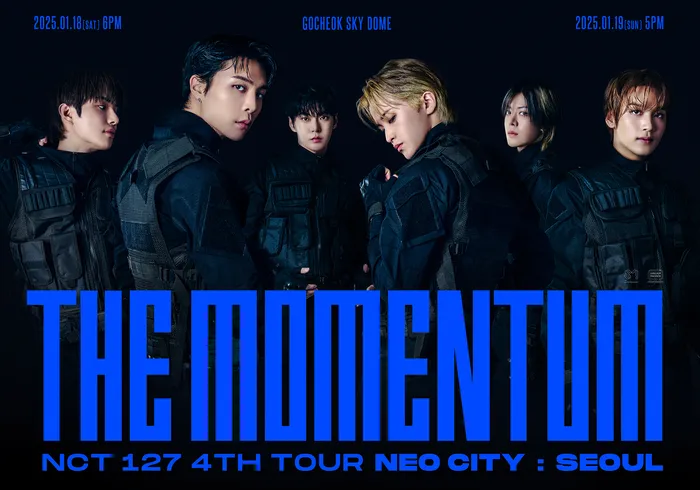

In [7]:
# 이미지 확인
from PIL import Image
img = Image.open(path)
img

In [8]:
# 기사 본문 디코딩
file_base64 = article[0]
decoded_data = base64.decodebytes(file_base64)

In [9]:
decoded_data

b'\xea\xb7\xb8\xeb\xa3\xb9 NCT127\xec\x9d\xb4 \xea\xb3\xa0\xec\xb2\x99\xeb\x8f\x94 \xec\xbd\x98\xec\x84\x9c\xed\x8a\xb8\xeb\x8f\x84 \xec\xa0\x84\xec\x84\x9d \xeb\xa7\xa4\xec\xa7\x84\xec\x9d\x84 \xea\xb8\xb0\xeb\xa1\x9d\xed\x96\x88\xeb\x8b\xa4. \xe2\x80\x98NCT127 4TH \xed\x88\xac\xec\x96\xb4 \xe2\x80\x98\xeb\x84\xa4\xec\x98\xa4 \xec\x8b\x9c\xed\x8b\xb0 \xe2\x80\x93 \xeb\x8d\x94 \xeb\xaa\xa8\xeb\xa9\x98\xed\x85\x80\xe2\x80\x99\xe2\x80\x99\xec\x9d\x98 \xec\x84\x9c\xec\x9a\xb8 \xea\xb3\xb5\xec\x97\xb0\xec\x9d\x80 2025\xeb\x85\x84 1\xec\x9b\x94 18\xea\xb3\xbc 19\xec\x9d\xbc \xec\x84\x9c\xec\x9a\xb8 \xea\xb3\xa0\xec\xb2\x99\xec\x8a\xa4\xec\xb9\xb4\xec\x9d\xb4\xeb\x8f\x94\xec\x97\x90\xec\x84\x9c \xed\x99\x94\xeb\xa0\xa4\xed\x95\x98\xea\xb2\x8c \xed\x8e\xbc\xec\xb3\x90\xec\xa7\x84\xeb\x8b\xa4. NCT127\xec\x9d\x98 \xeb\x84\xa4 \xeb\xb2\x88\xec\xa7\xb8 \xec\x9b\x94\xeb\x93\x9c \xed\x88\xac\xec\x96\xb4\xec\x9d\x98 \xed\x8f\xac\xeb\xac\xb8\xec\x9d\x84 \xec\x97\xac\xeb\x8a\x94 \xea\xb3\xb5\xec\x97\x

In [10]:
article = decoded_data.decode('utf-8')

In [11]:
print(article)

그룹 NCT127이 고척돔 콘서트도 전석 매진을 기록했다. ‘NCT127 4TH 투어 ‘네오 시티 – 더 모멘텀’’의 서울 공연은 2025년 1월 18과 19일 서울 고척스카이돔에서 화려하게 펼쳐진다. NCT127의 네 번째 월드 투어의 포문을 여는 공연인 만큼 글로벌 팬들의 뜨거운 관심을 얻고 있다. 특히 이번 공연은 멜론 티켓을 통해 지난 15일 팬클럽 선예매, 19일 일반 예매가 진행되었으며, 치열한 티켓 경쟁 속 단숨에 2회 공연 모두 전석 매진을 기록해 NCT127의 폭발적인 인기를 실감케 했다. 서울 공연은 2023년 11월 서울 KSPO DOME에서 진행된 ‘네오 시티 – 더 유니티’ 이후 약 1년 2개월 만에 열리는 NCT127의 새로운 국내 단독 콘서트로, 대규모 공연장에 걸맞은 더욱 업그레이드된 음악과 극강의 퍼포먼스, 환상적인 연출이 어우러진 무대를 만끽할 수 있을 전망이다. NCT127은 서울 공연을 시작으로 자카르타, 방콕, 덜루스, 뉴어크, 토론토, 로즈몬트, 샌안토니오, LA, 오사카, 타이베이, 후쿠오카, 나고야, 마카오 등 전 세계 주요 도시에서 월드 투어를 개최한다.


### 2-7-2. 문서 요약 / 키워드 추출

In [12]:
from gensim.summarization.summarizer import summarize
from gensim.summarization.textcleaner import split_sentences

#### summarize 함수

In [18]:
# 단어수 기반 요약 (word_count)
print(summarize(article, word_count=10))

‘NCT127 4TH 투어 ‘네오 시티 – 더 모멘텀’’의 서울 공연은 2025년 1월 18과 19일 서울 고척스카이돔에서 화려하게 펼쳐진다.


In [52]:
# 비율 기반 요약 (ratio)
print(summarize(article, ratio=0.4))

‘NCT127 4TH 투어 ‘네오 시티 – 더 모멘텀’’의 서울 공연은 2025년 1월 18과 19일 서울 고척스카이돔에서 화려하게 펼쳐진다.
서울 공연은 2023년 11월 서울 KSPO DOME에서 진행된 ‘네오 시티 – 더 유니티’ 이후 약 1년 2개월 만에 열리는 NCT127의 새로운 국내 단독 콘서트로, 대규모 공연장에 걸맞은 더욱 업그레이드된 음악과 극강의 퍼포먼스, 환상적인 연출이 어우러진 무대를 만끽할 수 있을 전망이다.


In [31]:
# 요약 텍스트 저장
article_summarized = summarize(article, ratio=0.4)

#### 키워드 추출

In [19]:
import collections
import textwrap
import re

In [20]:
# 줄바꿈 정렬
article_align = textwrap.fill(article, width=50)
print(article_align)

그룹 NCT127이 고척돔 콘서트도 전석 매진을 기록했다. ‘NCT127 4TH 투어
‘네오 시티 – 더 모멘텀’’의 서울 공연은 2025년 1월 18과 19일 서울
고척스카이돔에서 화려하게 펼쳐진다. NCT127의 네 번째 월드 투어의 포문을 여는 공연인
만큼 글로벌 팬들의 뜨거운 관심을 얻고 있다. 특히 이번 공연은 멜론 티켓을 통해 지난
15일 팬클럽 선예매, 19일 일반 예매가 진행되었으며, 치열한 티켓 경쟁 속 단숨에 2회
공연 모두 전석 매진을 기록해 NCT127의 폭발적인 인기를 실감케 했다. 서울 공연은
2023년 11월 서울 KSPO DOME에서 진행된 ‘네오 시티 – 더 유니티’ 이후 약
1년 2개월 만에 열리는 NCT127의 새로운 국내 단독 콘서트로, 대규모 공연장에 걸맞은
더욱 업그레이드된 음악과 극강의 퍼포먼스, 환상적인 연출이 어우러진 무대를 만끽할 수 있을
전망이다. NCT127은 서울 공연을 시작으로 자카르타, 방콕, 덜루스, 뉴어크, 토론토,
로즈몬트, 샌안토니오, LA, 오사카, 타이베이, 후쿠오카, 나고야, 마카오 등 전 세계
주요 도시에서 월드 투어를 개최한다.


In [21]:
# 단어 추출
words = re.findall(r'\w+', article_align)
print(words)

['그룹', 'NCT127이', '고척돔', '콘서트도', '전석', '매진을', '기록했다', 'NCT127', '4TH', '투어', '네오', '시티', '더', '모멘텀', '의', '서울', '공연은', '2025년', '1월', '18과', '19일', '서울', '고척스카이돔에서', '화려하게', '펼쳐진다', 'NCT127의', '네', '번째', '월드', '투어의', '포문을', '여는', '공연인', '만큼', '글로벌', '팬들의', '뜨거운', '관심을', '얻고', '있다', '특히', '이번', '공연은', '멜론', '티켓을', '통해', '지난', '15일', '팬클럽', '선예매', '19일', '일반', '예매가', '진행되었으며', '치열한', '티켓', '경쟁', '속', '단숨에', '2회', '공연', '모두', '전석', '매진을', '기록해', 'NCT127의', '폭발적인', '인기를', '실감케', '했다', '서울', '공연은', '2023년', '11월', '서울', 'KSPO', 'DOME에서', '진행된', '네오', '시티', '더', '유니티', '이후', '약', '1년', '2개월', '만에', '열리는', 'NCT127의', '새로운', '국내', '단독', '콘서트로', '대규모', '공연장에', '걸맞은', '더욱', '업그레이드된', '음악과', '극강의', '퍼포먼스', '환상적인', '연출이', '어우러진', '무대를', '만끽할', '수', '있을', '전망이다', 'NCT127은', '서울', '공연을', '시작으로', '자카르타', '방콕', '덜루스', '뉴어크', '토론토', '로즈몬트', '샌안토니오', 'LA', '오사카', '타이베이', '후쿠오카', '나고야', '마카오', '등', '전', '세계', '주요', '도시에서', '월드', '투어를', '개최한다']


In [22]:
# 빈도수 산출
counter = collections.Counter(words)
print(counter)

Counter({'서울': 5, '공연은': 3, 'NCT127의': 3, '전석': 2, '매진을': 2, '네오': 2, '시티': 2, '더': 2, '19일': 2, '월드': 2, '그룹': 1, 'NCT127이': 1, '고척돔': 1, '콘서트도': 1, '기록했다': 1, 'NCT127': 1, '4TH': 1, '투어': 1, '모멘텀': 1, '의': 1, '2025년': 1, '1월': 1, '18과': 1, '고척스카이돔에서': 1, '화려하게': 1, '펼쳐진다': 1, '네': 1, '번째': 1, '투어의': 1, '포문을': 1, '여는': 1, '공연인': 1, '만큼': 1, '글로벌': 1, '팬들의': 1, '뜨거운': 1, '관심을': 1, '얻고': 1, '있다': 1, '특히': 1, '이번': 1, '멜론': 1, '티켓을': 1, '통해': 1, '지난': 1, '15일': 1, '팬클럽': 1, '선예매': 1, '일반': 1, '예매가': 1, '진행되었으며': 1, '치열한': 1, '티켓': 1, '경쟁': 1, '속': 1, '단숨에': 1, '2회': 1, '공연': 1, '모두': 1, '기록해': 1, '폭발적인': 1, '인기를': 1, '실감케': 1, '했다': 1, '2023년': 1, '11월': 1, 'KSPO': 1, 'DOME에서': 1, '진행된': 1, '유니티': 1, '이후': 1, '약': 1, '1년': 1, '2개월': 1, '만에': 1, '열리는': 1, '새로운': 1, '국내': 1, '단독': 1, '콘서트로': 1, '대규모': 1, '공연장에': 1, '걸맞은': 1, '더욱': 1, '업그레이드된': 1, '음악과': 1, '극강의': 1, '퍼포먼스': 1, '환상적인': 1, '연출이': 1, '어우러진': 1, '무대를': 1, '만끽할': 1, '수': 1, '있을': 1, '전망이다': 1, 'NCT127은': 1, '공연을': 1, '시작으로': 1,

In [42]:
# 키워드 추출
print(counter.most_common(5))

[('서울', 5), ('공연은', 3), ('NCT127의', 3), ('전석', 2), ('매진을', 2)]


In [54]:
keywords = counter.most_common(5)

b = keywords[1][0]
c = keywords[2][0]
e = keywords[4][0]
keywords = [keywords[0][0], b[:2], c[:6], keywords[3][0], e[:2]]
print(keywords)

['서울', '공연', 'NCT127', '전석', '매진']


### 2-7-2. 요약 리포트 작성

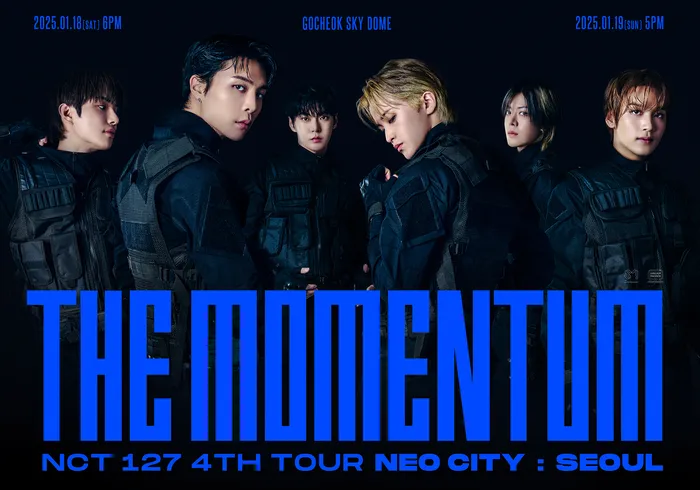

In [55]:
from IPython.display import Image
Image(filename=path, width=300)

In [32]:
print(article_summarized)

‘NCT127 4TH 투어 ‘네오 시티 – 더 모멘텀’’의 서울 공연은 2025년 1월 18과 19일 서울 고척스카이돔에서 화려하게 펼쳐진다.
서울 공연은 2023년 11월 서울 KSPO DOME에서 진행된 ‘네오 시티 – 더 유니티’ 이후 약 1년 2개월 만에 열리는 NCT127의 새로운 국내 단독 콘서트로, 대규모 공연장에 걸맞은 더욱 업그레이드된 음악과 극강의 퍼포먼스, 환상적인 연출이 어우러진 무대를 만끽할 수 있을 전망이다.


In [50]:
keys = ['# ' + elem for elem in keywords]
keys = ' '.join(keys)
print(keys)

# 서울 # 공연 # NCT127 # 전석 # 매진


### 2-7-4. html 파일로 저장

[원본 기사](https://n.news.naver.com/mnews/article/018/0005303739?sid=105)

In [53]:
# html 파일 저장
htmlfile = open("news/summary.html", "w")
htmlfile.write("<html>\n")
htmlfile.write ("<h1>"+ 'NCT 127, 고척돔 전석 매진' + "</h2>\n") 
htmlfile.write ("<img src='image.jpg'/>\n")
htmlfile.write ("<h2>"+ article_summarized + "</h2>\n") 
htmlfile.write ("<h2 style='background-color:#cafc03;''>"+ keys + "</h2>\n") 
htmlfile.write("</html>\n")
htmlfile.close()